Jeff Box<br/>
GT Data Science Bootcamp<br/>
Python APIs Homework 6<br/>
July 16, 2018<br/>

# WeatherPy

Purpose: Purpose: proving the weather gets hotter as you approach the equator by creating python script to visualize the weather of 500+ cities across the world of varying distance from the equator. <br/><br/>
Utilize: 1) citipy and the 2) OpenWeatherMap API<br/><br/>
Objective: build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

This notebook will:

* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

# Thoughts

Understand the Geographic coordinate system. <span style="color:blue"> latitude goes from -180 to 180 and longitude goes from -90 to 90. https://en.wikipedia.org/wiki/Spherical_coordinate_system and tested this in maps.google.com </span>
<br><br>
Study of the OpenWeatherMap API: 
* Where do you request the API key? <span style="color:blue">you obtain it from openweathermap.org, and you use it in the query URL: api.openweathermap.org/data/2.5/forecast?id=524901&APPID=1111111111 where APPID is the key</span>.
* Which Weather API in particular will you need? <span style="color:blue">Current Weather Data: https://openweathermap.org/current</span>.
* What URL endpoints does it expect? <span style="color:blue">units (weather?units=Imperial), the key (&APPID=), and the query (q=London) by name, ID, coordinates, and possibly some other parameters. </span>.
* What JSON structure does it respond with? <span style="color:blue">it appears to be a dictionary of dictionaries and lists from: https://openweathermap.org/current</span><br/>
    * <span style="color:red">{"coord":
{"lon":145.77,"lat":-16.92},
"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],
"base":"cmc stations",
"main":{"temp":293.25,"pressure":1019,"humidity":83,"temp_min":289.82,"temp_max":295.37},
"wind":{"speed":5.1,"deg":150},
"clouds":{"all":75},
"rain":{"3h":3},
"dt":1435658272,
"sys":{"type":1,"id":8166,"message":0.0166,"country":"AU","sunrise":1435610796,"sunset":1435650870},
"id":2172797,
"name":"Cairns",
"cod":200}.</span>

Questions:
* What is Citipy for? <span style="color:blue">"Looking up for city names with geo-coordinates": https://github.com/wingchen/citipy/blob/master/README.md</span>.
* Why would you use it in conjunction with the OpenWeatherMap API? <span style="color:blue">it's for connecting city names to the corresponding weather using cartesian coordinates as the key</span>.
* How would you do so? <span style="color:blue">we're about to find out... </span>.
<br>

Considerations: In building your script, pay attention to the cities you are using in your query pool. 
* Are you getting coverage of the full gamut of latitudes and longitudes? 
* Or are you simply choosing 500 cities concentrated in one region of the world? 
* Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from owm_api import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes. This covers the entire earth. 
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of 1500 random lat and lng combinations
# This block was modified to use the range specified in the previous input
lats = np.random.uniform(lat_range[0],lat_range[1], size=1500) #list
lngs = np.random.uniform(lng_range[0],lng_range[1], size=1500) #list
lat_lngs = zip(lats, lngs) #zipped list of lists

# loop through the zip object and identify nearest city for each lat, lng combination
#this is done through the citipy method "nearest_city().city_name" where the parameters are (lat, long)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list (initialized above)
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count >= 500
if len(cities) < 500:
    print("City list is less than 500 and does not meet requirements. Please run again.")
else:
    print(len(cities))
    
print(f'(Test message) This is the first city in the randomized list: {cities[0]}')

592
(Test message) This is the first city in the randomized list: taolanaro


## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_key

# Starting URL for Weather Map API Call
units = "Imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

#initialize lists
city_list = []
lat_list = []
temp = []
humidity = []
clouds = []
wind = []

#initialize error counter
counter = 0

#show the json output for reference
atl = requests.get(url + "Atlanta").json()

# Query loop
for x in cities:
    try:
        response = requests.get(url + x).json()
        city_list.append(response['name'])
        lat_list.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except:
        counter = counter + 1

print(f'{counter} cities were not added to the list of {len(cities)} total cities')
print(f'{len(cities)-counter} cities added for analysis')
if len(cities)-counter < 500:
    print("insufficient data: please rerun analysis")
else:
    print("proceed")
print("This is Atlanta's decrypted JSON data for reference")
atl

# Testing the length of lists for dictionary creation    
# print("all of these numbers need to be equal to proceed:")
# print(len(temp))
# print(len(humidity))
# print(len(clouds))
# print(len(wind))

58 cities were not added to the list of 592 total cities
534 cities added for analysis
proceed
This is Atlanta's decrypted JSON data for reference


{'coord': {'lon': -84.39, 'lat': 33.75},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 83.05,
  'pressure': 1018,
  'humidity': 70,
  'temp_min': 80.6,
  'temp_max': 86},
 'visibility': 16093,
 'wind': {'speed': 6.93, 'deg': 280},
 'clouds': {'all': 75},
 'dt': 1531762500,
 'sys': {'type': 1,
  'id': 747,
  'message': 0.0048,
  'country': 'US',
  'sunrise': 1531737549,
  'sunset': 1531788478},
 'id': 4180439,
 'name': 'Atlanta',
 'cod': 200}

## Dictionary & Data Frame

In [5]:
# ye ol dictionary

weather_dict = {
    "city": city_list,
    "latitude": lat_list,
    "temperature": temp,
    "humidity": humidity,
    "cloudiness": clouds,
    "wind speed": wind
}

#ye ol data frame
weather_data = pd.DataFrame(weather_dict)

# save this data to a csv
weather_data.to_csv(output_data_file)

#display
weather_data.head()

,city,latitude,temperature,humidity,cloudiness,wind speed
0,Cape Town,-33.93,57.20,67,0,5.82
1,Tema,5.66,78.80,83,75,14.99
2,Freeport,26.54,89.60,66,75,3.36
3,Albany,42.65,89.82,36,40,3.36
4,Ostrovnoy,68.05,55.68,74,0,12.75


## Temperature (F) vs. Latitude Plot

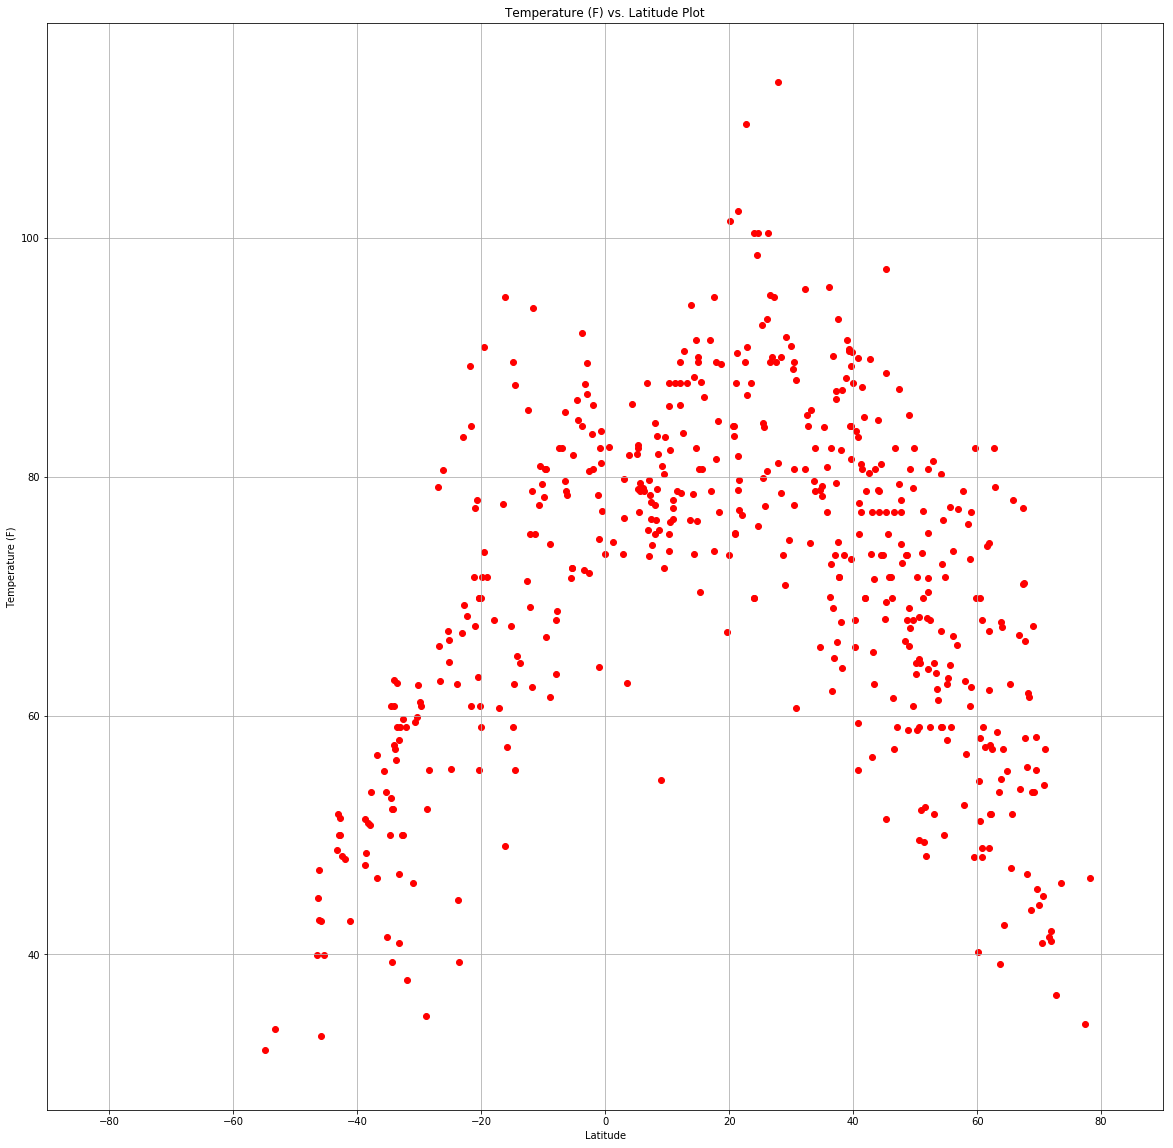

In [7]:
# Build a scatter plot
plt.scatter(weather_data["latitude"], weather_data["temperature"], marker="o", c='r')

# Incorporate the other graph properties
plt.rcParams["figure.figsize"] = (20,20)
plt.title("Temperature (F) vs. Latitude Plot")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(min(weather_data["temperature"])-5,max(weather_data["temperature"]+5))

# Save the figure
plt.savefig("output_data/Temp_vs_Lat.png")

# Show plot
plt.show()

## Humidity (%) vs. Latitude Plot

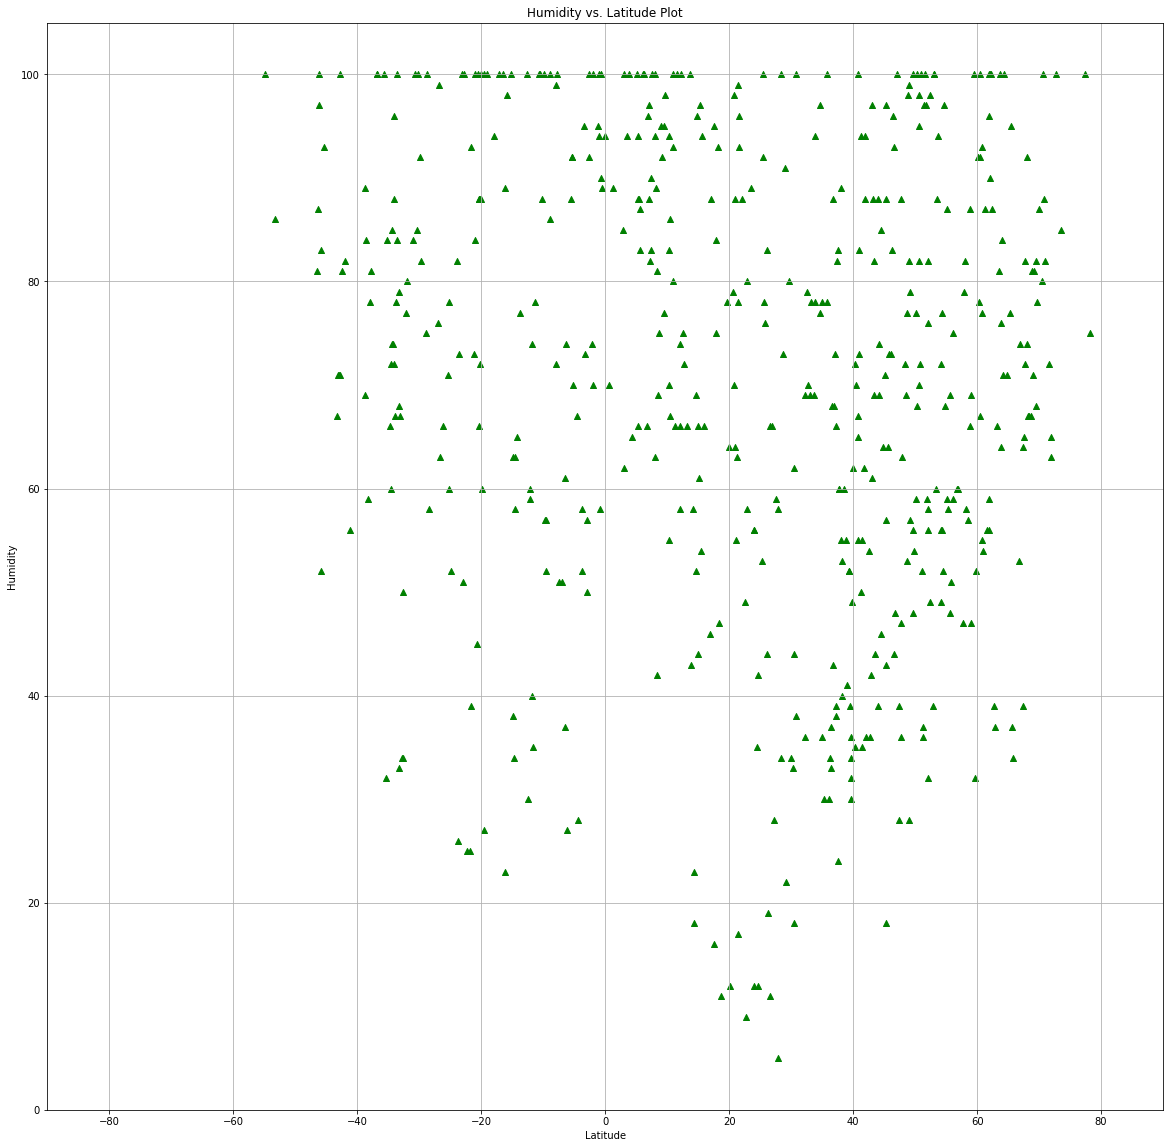

In [8]:
# Build a scatter plot
plt.scatter(weather_data["latitude"], weather_data["humidity"], marker="^", c='g')

# Incorporate the other graph properties
plt.rcParams["figure.figsize"] = (20,20)
plt.title("Humidity vs. Latitude Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(min(weather_data["humidity"])-5,max(weather_data["humidity"]+5))

# Save the figure
plt.savefig("output_data/Temp_vs_humidity.png")

# Show plot
plt.show()

## Cloudiness (%) vs. Latitude Plot

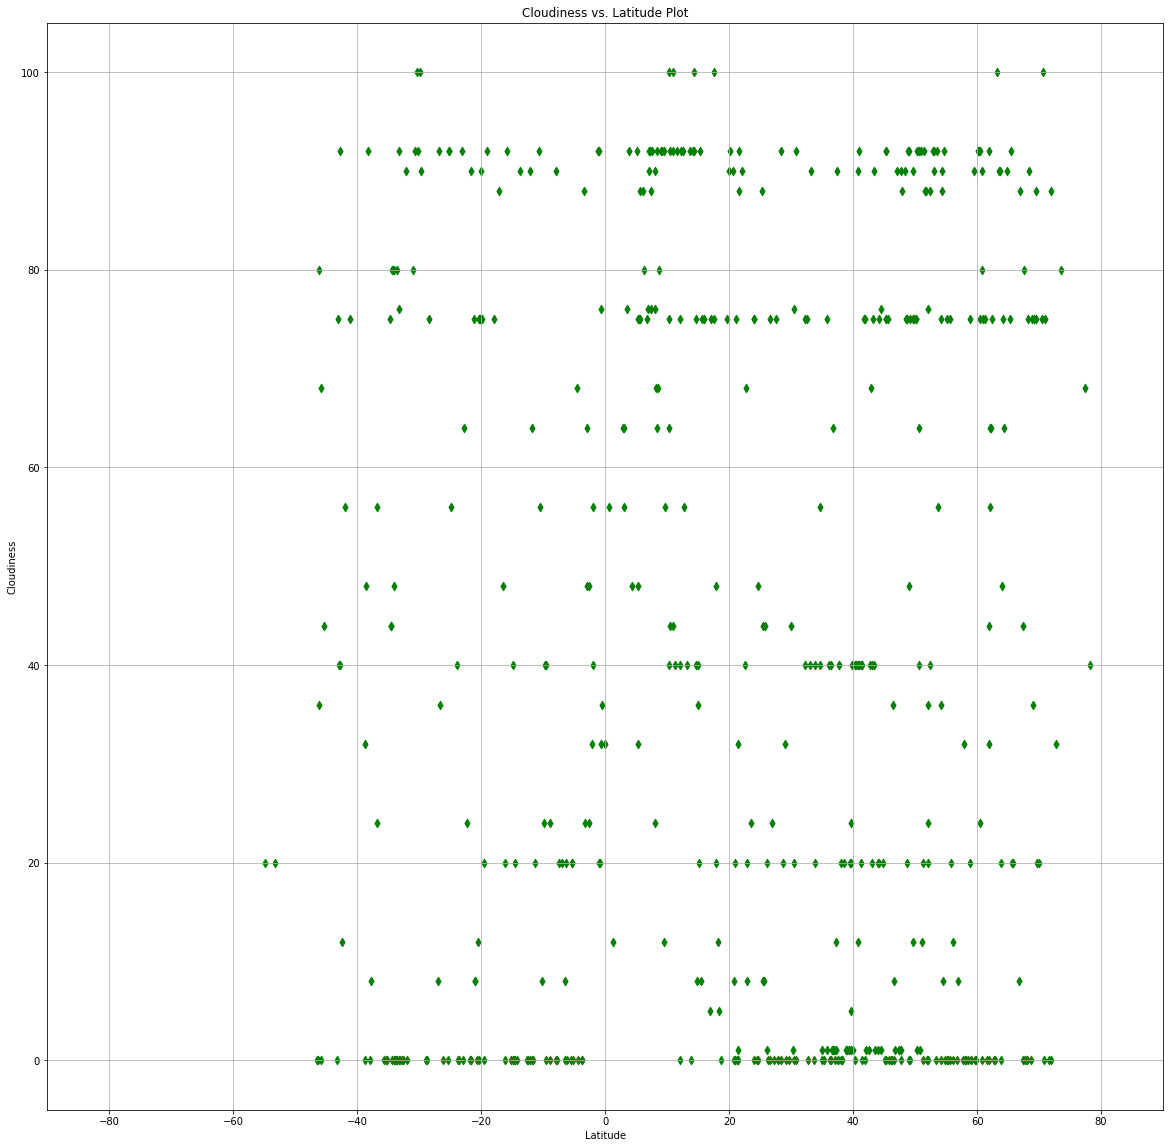

In [9]:
# Build a scatter plot
plt.scatter(weather_data["latitude"], weather_data["cloudiness"], marker="d", c="g")

# Incorporate the other graph properties
plt.rcParams["figure.figsize"] = (20,20)
plt.title("Cloudiness vs. Latitude Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(min(weather_data["cloudiness"])-5,max(weather_data["cloudiness"]+5))

# Save the figure
plt.savefig("output_data/Temp_vs_cloudiness.png")

# Show plot
plt.show()

## Wind Speed (mph) vs. Latitude Plot

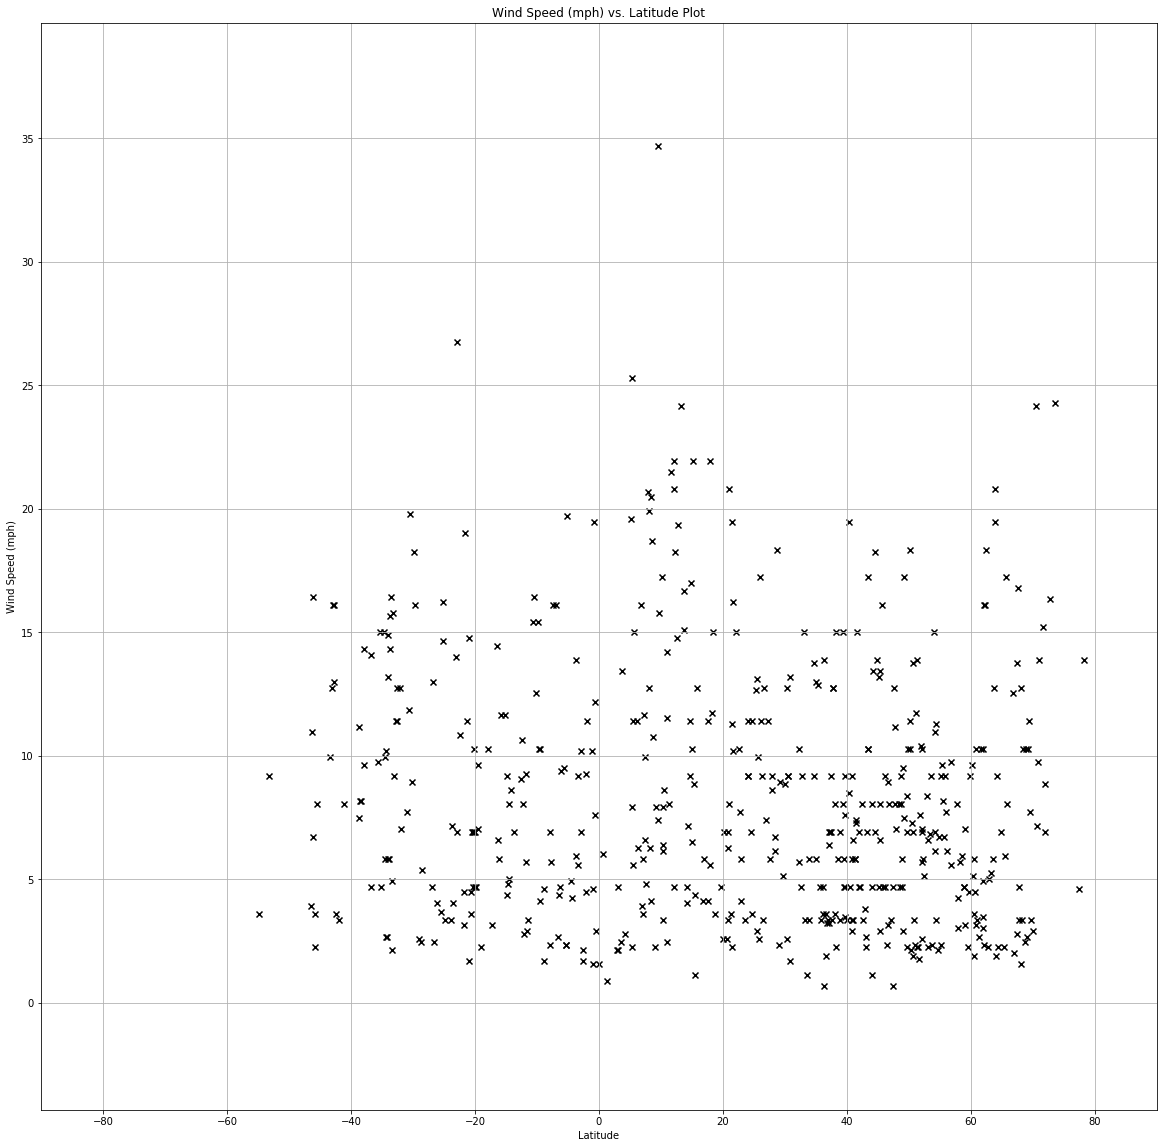

In [10]:
# Build a scatter plot
plt.scatter(weather_data["latitude"], weather_data["wind speed"], marker="x", c='k')

# Incorporate the other graph properties
plt.rcParams["figure.figsize"] = (20,20)
plt.title("Wind Speed (mph) vs. Latitude Plot")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(min(weather_data["wind speed"])-5,max(weather_data["wind speed"]+5))

# Save the figure
plt.savefig("output_data/Temp_vs_wind.png")

# Show plot
plt.show()

## Analysis

In [13]:
output = 'output_data/analysis.md'

with open(output, 'w') as w:
        header = "# WEATHERPY ANALYSIS\n## Jeff Box\n"
        w.write(header)
        first_line = "1. Temperature tends to increase as you move closer to the equator\n"
        w.write(first_line)
        second_line = "2. Humidity tends to decrease as you move farther from the equator\n"
        w.write(second_line)
        third_line = "3. Wind speed and cloudiness have no relationship with distance from equator"
        w.write(third_line)